In [1]:
import os
import json
import warnings

import string
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.dpi'] = 200
mpl.rcParams["text.usetex"] = True
%matplotlib inline
import tikzplotlib

from monty.json import MontyDecoder
from pymatgen import Structure, Element, Composition
from icet.tools.convex_hull import ConvexHull

from support_functions import set_up_convexhull_data, get_configuration_data_list, \
    clean_data_list, draw_convex_hull

figures_dir = "../../../figures/batteries"

color0 = "#3373A8"
color1 = "#B93033"
# color0 = "#163D5C"
# color1 = "#B1CCE3"
color2 = "#3AA99F"
color3 = "#EECF5A"
color4 = "#E65239"
color5 = "#B81F1F"
color6 = "#2368A2"

## Comparing the O1 stacking versus the O3 stacking

In [2]:
with open("data/O1_data.json", "r") as file:
    O1_data_list = json.loads(file.read(), cls=MontyDecoder)
with open("data/O3_data.json", "r") as file:
    O3_data_list = json.loads(file.read(), cls=MontyDecoder)

In [3]:
charged_energy = [data["energy"] / len(data["initial_structure"]) * 6 for data in O3_data_list 
                  if data["initial_structure"].composition.element_composition["Li"] == 0][0]
discharged_energy = [data["energy"] / len(data["initial_structure"]) * 6 for data in O3_data_list 
                     if data["initial_structure"].composition.element_composition["Li"] 
                     / len(data["initial_structure"]) * 6 == 2.0][0]

set_up_convexhull_data(
    data_list=O3_data_list, element=Element("Li"), ref_composition=Composition("Li2MnO3"),
    endpoint_energies=[charged_energy, discharged_energy]
)
set_up_convexhull_data(
    data_list=O1_data_list, element=Element("Li"), ref_composition=Composition("Li2MnO3"),
    endpoint_energies=[charged_energy, discharged_energy]
)

O3_data_list = clean_data_list(O3_data_list, max_angle_diff=12, angles_tolerance=0)
O1_data_list = clean_data_list(O1_data_list, max_angle_diff=12, angles_tolerance=0)

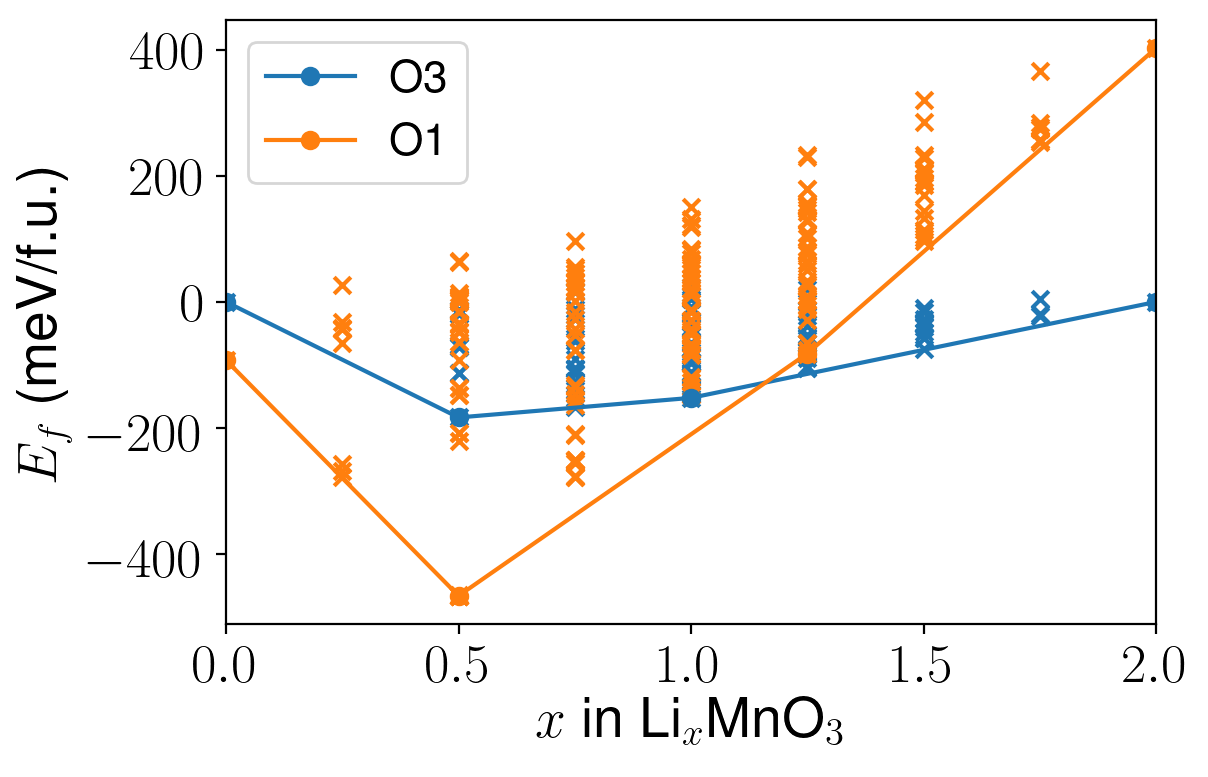

In [4]:
rc_font_dict = {"size": 20, "family": "sans-serif", 
                    "sans-serif": ['Helvetica', 'Verdana', 'Tahoma', 'Lucida Grande']}

plt.rc("font", **rc_font_dict)
fig, ax = plt.subplots(figsize=(6, 4))

ax.set_xlabel(r'$x$ in Li$_x$MnO$_3$')
ax.set_ylabel(r'$E_f$ (meV/f.u.)')
ax.set_xlim([0, 2])

for data_list in [O3_data_list, O1_data_list]:
    concentrations = [d["concentration"] for d in data_list]
    mixing_energies = [d["mixing_energy"] for d in data_list]
    hull = ConvexHull(concentrations, mixing_energies)
    ax.scatter(concentrations, 1e3 * np.array(mixing_energies), marker='x')
    ax.plot(hull.concentrations, 1e3 * hull.energies, '-o')

plt.legend(["O3", "O1"], fontsize=16)
plt.savefig(os.path.join(figures_dir, "o1_vs_o3.png"), bbox_inches="tight")

Switch the x axis

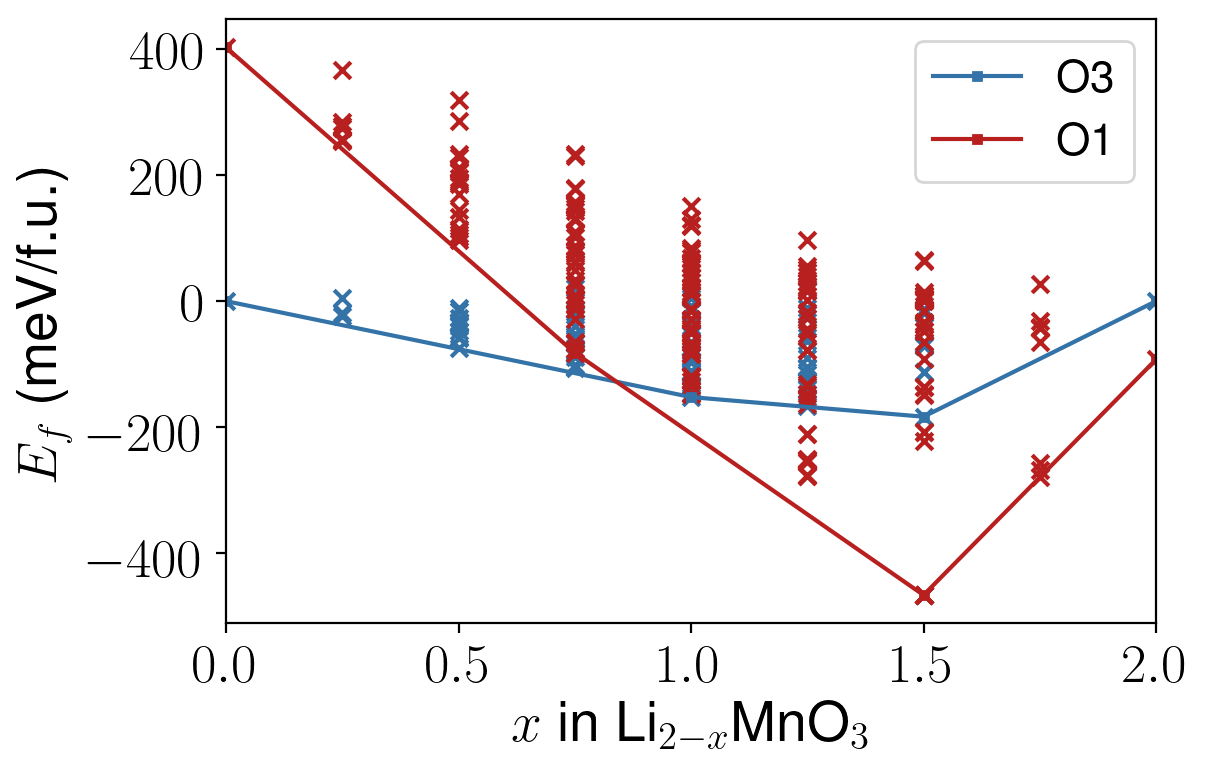

In [5]:
rc_font_dict = {"size": 20, "family": "sans-serif", 
                    "sans-serif": ['Helvetica', 'Verdana', 'Tahoma', 'Lucida Grande']}

plt.rc("font", **rc_font_dict)
fig, ax = plt.subplots(figsize=(6, 4))

ax.set_xlabel(r'$x$ in Li$_{2-x}$MnO$_3$')
ax.set_ylabel(r'$E_f$ (meV/f.u.)')
ax.set_xlim([0, 2])

for data_list, color in zip([O3_data_list, O1_data_list], [color0, color5]):
    concentrations = [2 - d["concentration"] for d in data_list]
    mixing_energies = [d["mixing_energy"] for d in data_list]
    hull = ConvexHull(concentrations, mixing_energies)
    ax.scatter(concentrations, 1e3 * np.array(mixing_energies), marker='x',
               color=color)
    ax.plot(hull.concentrations, 1e3 * hull.energies, '-s', markersize=3,
            color=color)

plt.legend(["O3", "O1"], fontsize=16)
# plt.savefig(os.path.join(figures_dir, "o1_vs_o3.png"), bbox_inches="tight")
tikzplotlib.save(filepath=os.path.join(figures_dir, "o1_vs_o3-data.tex"), 
                 add_axis_environment=False)